# ECG classification

Laurent Cetinsoy - Datadidacte


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

In [2]:
arr = np.loadtxt('arr.txt')
chf = np.loadtxt('chf.txt')
nsr = np.loadtxt('nsr.txt')

In [3]:
def plot_ecg_signals(arr, chf, nsr):
    _, axs = plt.subplots(nrows=3, figsize=(12, 8))

    time = np.linspace(0, 10, len(arr))
    axs[0].plot(time, arr, label='Arrhythmia')
    axs[0].set_title('ECG signal - Arrhythmia')
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()

    time = np.linspace(0, 10, len(chf))
    axs[1].plot(time, chf, label='Heart failure', color='orange')
    axs[1].set_title('ECG signal - Heart Failure')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()

    time = np.linspace(0, 10, len(nsr))
    axs[2].plot(time, nsr, label='Normal sinus rhythm', color='green')
    axs[2].set_title('ECG signal - Normal sinus rhythm')
    axs[2].set_xlabel('Time (seconds)')
    axs[2].set_ylabel('Amplitude')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

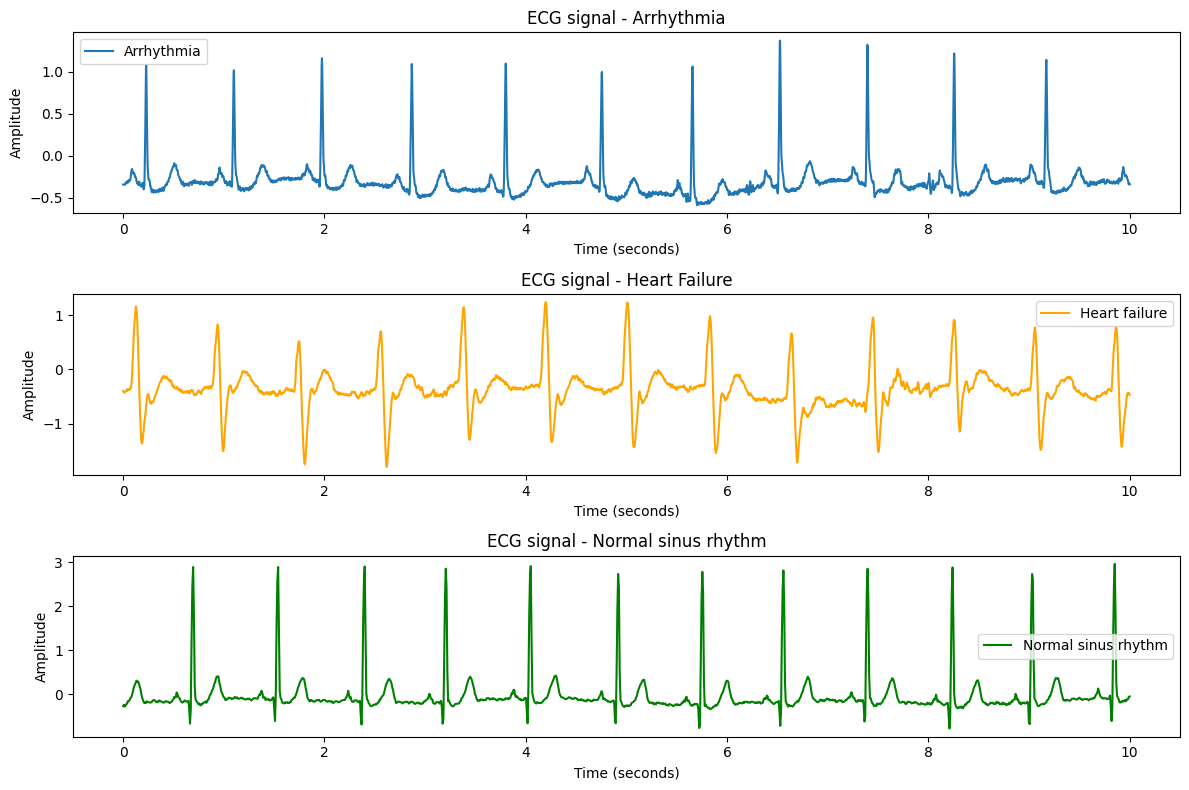

In [4]:
plot_ecg_signals(arr, chf, nsr)

> We can see that the signals are different (in terms of shape) but have the same period T (approximately) corresponding to the beat of a heart.

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [5]:
def calculate_stats_features(x):
    return np.nanmax(x), np.nanmin(x), np.nanmean(x), np.nanmedian(x), np.nanvar(x)

# Test
calculate_stats_features([1, 2, 3, 4])

(4, 1, 2.5, 2.5, 1.25)



Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [6]:
def calculate_zero_crossing(x):
    sign_changes = np.signbit(x)
    sign_diff = np.diff(sign_changes)
    return np.count_nonzero(sign_diff)

# Test
calculate_zero_crossing([1, -1, 2, 3, -2])

3

Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [7]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(np.square(x)))

# Test
calculate_rms([2, -2, 2])

2.0

Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [8]:
from scipy.stats import entropy

def calculate_entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probabilities = counts / counts.sum()
    return entropy(probabilities)

# Test
calculate_entropy([1, 2, 3, 3])

1.0397207708399179

Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [9]:
def get_features(x):
    max, min, mean, median, var  = calculate_stats_features(x)
    zeros_cross = calculate_zero_crossing(x)
    rms = calculate_rms(x)
    entropy = calculate_entropy(x)
    return {
        "max": max,
        "min": min,
        "mean": mean,
        "median": median,
        "var": var,
        "zeros_cross": zeros_cross,
        "rms": rms,
        "entropy": entropy
    }

# Test
get_features([1, -1, 2, -2, 3, 4])

{'max': 4,
 'min': -2,
 'mean': 1.1666666666666667,
 'median': 1.5,
 'var': 4.472222222222222,
 'zeros_cross': 4,
 'rms': 2.41522945769824,
 'entropy': 1.791759469228055}

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [10]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

/home/alex/Desktop/health/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
df = pd.read_csv("ECG-laurent.csv")
labels = df["1"]
data_df = df.drop(columns=["0", "1"])

data_df

/tmp/ipykernel_108945/887217422.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ECG-laurent.csv")


,2,3,4,5,6,7,8,9,10,11,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,-0.383509,-0.397815,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,-0.480109,-0.429882,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,-0.159727,-0.180824,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,0.081658,0.057652,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,-0.174277,-0.187081,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.074907,0.105856,-0.000567,-0.439990,-0.876207,-1.187291,-1.334461,-1.255440,-1.070235,-0.898777,...,-0.027454,0.002023,0.025988,0.018896,0.033075,0.050003,0.059558,0.056467,0.098536,0.089279
158,-0.320028,-0.404340,-0.396922,-0.409747,-0.408599,-0.397462,-0.391675,-0.345731,-0.350851,-0.329378,...,-0.235219,-0.209356,-0.203681,-0.195236,-0.203310,-0.192466,-0.200470,-0.177530,-0.195617,-0.168229
159,-0.117367,-0.069165,-0.072747,-0.090340,-0.095915,-0.094605,-0.138618,-0.139901,-0.146395,-0.154829,...,-0.194281,-0.188166,-0.179020,-0.201753,-0.184603,-0.185422,-0.180237,-0.187840,-0.172069,-0.171569
160,0.191584,0.405085,0.315481,0.218790,-0.024663,-0.169857,-0.366068,-0.493332,-0.618309,-0.690620,...,-0.203226,-0.223304,-0.226758,-0.238972,-0.218572,-0.261438,-0.243642,-0.320345,-0.296373,-0.381885


In [12]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
157    2
158    2
159    2
160    2
161    2
Name: 1, Length: 162, dtype: int64

In [13]:
features_df = data_df.apply(lambda x: pd.Series(get_features(x)), axis=1)
features_df

,max,min,mean,median,var,zeros_cross,rms,entropy
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,11.090355
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,11.090355
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,11.090355
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,11.090355
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,11.090355
...,...,...,...,...,...,...,...,...
157,0.635837,-2.036593,-0.217742,-0.113975,0.165278,2068.0,0.461183,11.090355
158,2.777683,-1.408466,-0.270539,-0.258593,0.023627,692.0,0.311157,11.090355
159,0.919894,-1.070185,-0.172078,-0.164195,0.018569,1762.0,0.219498,11.090355
160,7.078177,-5.961910,-0.343730,-0.390100,0.545255,3645.0,0.814497,11.090355


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.33, random_state=42)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 0.6667


try to tweak the model hyperparameter to see if it works

In [17]:
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 16),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 16)
    }
    model = RandomForestClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy').mean()
    return score

In [18]:
study_rf = optuna.create_study(direction='maximize')
%time study_rf.optimize(objective_rf, n_trials=100)

[I 2024-12-05 01:54:39,538] A new study created in memory with name: no-name-c960028e-1028-4d94-af29-ef68905febc0
[I 2024-12-05 01:54:39,839] Trial 0 finished with value: 0.7962962962962963 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.7962962962962963.
[I 2024-12-05 01:54:39,904] Trial 1 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 39, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.7962962962962963.
[I 2024-12-05 01:54:40,036] Trial 2 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 94, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.7962962962962963.
[I 2024-12-05 01:54:40,200] Trial 3 finished with value: 0.8148148148148148 and parameters: {'n_estimators': 114, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 3 with value

CPU times: user 22 s, sys: 77.8 ms, total: 22.1 s
Wall time: 22 s


In [19]:
print("Best parameters", study_rf.best_params)
print("Best cross validation score", study_rf.best_value)

rf_model = RandomForestClassifier(**study_rf.best_params, random_state=42)
rf_model.fit(X_train, y_train)

Best parameters {'n_estimators': 133, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best cross validation score 0.8703703703703705


RandomForestClassifier(max_depth=32, n_estimators=133, random_state=42)

In [ ]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 0.6667


## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [21]:
def get_fourier_coefficients(ecg):
    fft_result = np.fft.fft(ecg)
    fft_mag = np.abs(fft_result)
    return fft_mag[:len(fft_mag)//2]

# Test
signal = np.sin([0, 1, 2, 3, 4])
get_fourier_coefficients(signal)

array([1.13508592, 2.13669854])

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [34]:
df_fourier = data_df.apply(lambda x: pd.Series(get_fourier_coefficients(x)), axis=1)
df_fourier.columns = df_fourier.columns.astype(str)
df_fourier

,0,1,2,3,4,5,6,7,8,9,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,17599.976889,1850.171567,295.333800,1185.545859,926.385162,538.293366,828.133738,689.752202,1559.152560,545.466498,...,1.099556,1.045791,0.235144,1.865392,1.570794,1.264249,1.287078,0.846852,1.615356,0.373965
1,14484.396444,4137.499334,2152.391165,2520.424900,2066.642615,1640.749953,1579.574817,945.659290,1648.125085,1195.160663,...,1.722051,2.652570,6.639854,0.622695,1.729210,2.705399,0.623744,0.574554,1.559272,0.884378
2,10683.818667,400.463461,481.532272,729.461562,964.923609,946.182174,618.667927,1231.230068,82.521093,910.135298,...,8.287070,4.246531,2.753554,6.270798,4.136835,1.777825,1.008231,2.256532,3.618107,5.542327
3,3536.462222,313.204866,531.520312,667.082007,647.502832,600.576281,620.723292,409.162029,2237.361623,501.455323,...,4.377541,1.592234,3.068360,1.958553,2.909697,3.388771,3.267543,2.945765,2.518522,2.006570
4,9756.496000,303.329945,596.020424,609.179346,380.981983,272.183845,1134.805832,111.595226,865.347508,194.837216,...,7.524246,7.355356,2.491244,8.254273,9.044668,6.631883,5.825186,6.519294,8.791134,11.619491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,14269.954560,593.412836,760.985169,1294.411838,1341.284484,913.092712,421.080003,1230.467798,495.875861,310.455683,...,0.897350,1.927539,0.518119,0.248199,2.120751,1.818941,2.064936,2.810718,2.494118,2.860149
158,17730.076160,378.721372,408.463206,581.751509,276.486875,177.656101,818.958481,415.362422,791.562387,313.919207,...,3.115961,3.087415,0.922637,1.543277,3.281298,1.411815,0.522622,1.670959,1.728851,1.948227
159,11277.319680,1434.196761,2603.621630,769.678837,1109.373133,479.235405,778.097122,1163.406930,628.928545,715.623275,...,2.787532,0.483426,1.611714,1.507179,0.769242,0.925464,2.203433,1.064754,1.467670,2.721503
160,22526.704640,289.587563,621.209385,322.026792,332.194610,843.567029,683.896537,939.492166,1015.935540,648.703645,...,6.233339,7.491898,3.492366,5.710833,7.020063,5.326488,15.122163,7.707624,0.629684,11.191931


Try to train a model using the Fourrier coefficient

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_fourier, labels, test_size=0.33, random_state=42)

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 0.6667


Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

In [38]:
X_combined = pd.concat([features_df, df_fourier], axis=1)
X_combined

,max,min,mean,median,var,zeros_cross,rms,entropy,0,1,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,11.090355,17599.976889,1850.171567,...,1.099556,1.045791,0.235144,1.865392,1.570794,1.264249,1.287078,0.846852,1.615356,0.373965
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,11.090355,14484.396444,4137.499334,...,1.722051,2.652570,6.639854,0.622695,1.729210,2.705399,0.623744,0.574554,1.559272,0.884378
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,11.090355,10683.818667,400.463461,...,8.287070,4.246531,2.753554,6.270798,4.136835,1.777825,1.008231,2.256532,3.618107,5.542327
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,11.090355,3536.462222,313.204866,...,4.377541,1.592234,3.068360,1.958553,2.909697,3.388771,3.267543,2.945765,2.518522,2.006570
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,11.090355,9756.496000,303.329945,...,7.524246,7.355356,2.491244,8.254273,9.044668,6.631883,5.825186,6.519294,8.791134,11.619491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.635837,-2.036593,-0.217742,-0.113975,0.165278,2068.0,0.461183,11.090355,14269.954560,593.412836,...,0.897350,1.927539,0.518119,0.248199,2.120751,1.818941,2.064936,2.810718,2.494118,2.860149
158,2.777683,-1.408466,-0.270539,-0.258593,0.023627,692.0,0.311157,11.090355,17730.076160,378.721372,...,3.115961,3.087415,0.922637,1.543277,3.281298,1.411815,0.522622,1.670959,1.728851,1.948227
159,0.919894,-1.070185,-0.172078,-0.164195,0.018569,1762.0,0.219498,11.090355,11277.319680,1434.196761,...,2.787532,0.483426,1.611714,1.507179,0.769242,0.925464,2.203433,1.064754,1.467670,2.721503
160,7.078177,-5.961910,-0.343730,-0.390100,0.545255,3645.0,0.814497,11.090355,22526.704640,289.587563,...,6.233339,7.491898,3.492366,5.710833,7.020063,5.326488,15.122163,7.707624,0.629684,11.191931


In [39]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, labels, test_size=0.33, random_state=42)

rf_model_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_combined.fit(X_train_combined, y_train_combined)

RandomForestClassifier(random_state=42)

In [40]:
train_accuracy = rf_model_combined.score(X_train_combined, y_train_combined)
test_accuracy = rf_model_combined.score(X_test_combined, y_test_combined)

print("Combined features")
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Combined features
Train accuracy: 1.0000
Test accuracy: 0.7222


## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


In [47]:
import pywt

In [48]:
def get_wavelet_coefficients(ecg):
    coeffs = pywt.wavedec(ecg, 'db4', level=5)
    return np.concatenate(coeffs)

Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

In [49]:
df_wavelet = data_df.apply(lambda x: pd.Series(get_wavelet_coefficients(x)), axis=1)
df_wavelet

,0,1,2,3,4,5,6,7,8,9,...,65558,65559,65560,65561,65562,65563,65564,65565,65566,65567
0,-0.372010,-0.260654,-0.309907,-0.310574,-0.227890,-0.617469,-3.022413,-0.604378,-2.923294,-2.514842,...,0.009048,0.020990,-0.037387,0.028253,0.002237,-0.000266,-0.028554,0.014615,0.031316,-0.027797
1,-3.173087,-3.259975,-3.247555,-3.213314,-3.233537,-3.503101,-4.413756,-3.744945,-4.174972,-2.149941,...,-0.023929,0.016427,0.000257,-0.018340,-0.019976,0.006214,-0.063029,0.020517,0.055184,-0.012997
2,-1.103193,-1.099563,-1.176437,-1.046143,-1.338005,-0.429386,-1.266284,0.946764,-1.024068,-4.975642,...,-0.049528,-0.109406,0.154508,0.025962,-0.032860,0.056736,-0.031413,0.009088,0.012298,-0.058915
3,0.511032,0.524136,0.504724,0.564642,0.127159,1.881995,0.826970,2.716503,2.056567,-4.306749,...,-0.005747,0.037289,0.045591,0.031034,0.009156,-0.016872,0.045184,-0.008458,-0.029453,0.015599
4,-2.293174,-2.361759,-2.336108,-2.245817,-2.792341,-0.828481,-0.887523,-1.091186,-0.018249,-0.362236,...,-0.025584,0.263982,-0.425948,0.128538,-0.049629,-0.076230,-0.007552,-0.001764,0.022396,0.089177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-1.764804,-1.535687,-1.778825,-1.645993,-1.611996,-1.857146,1.004171,-1.839111,1.440295,-1.415886,...,0.005358,0.007585,-0.010335,0.009463,0.001435,0.001654,0.022055,-0.007558,-0.020769,0.006174
158,-2.185889,-2.190012,-2.194289,-2.174928,-2.237561,-2.024021,-1.796112,-1.963102,-1.763992,-1.606030,...,-0.032759,0.007847,-0.012782,-0.000983,-0.008603,-0.008715,-0.017159,0.005511,0.017860,0.006525
159,-0.521020,-0.509723,-0.513106,-0.528018,-0.452068,-0.734531,-0.762689,-1.440162,-1.011210,-0.871353,...,0.014679,0.000326,0.000340,0.011216,0.009061,0.001568,0.008229,-0.002588,-0.008707,-0.001065
160,0.986213,1.105993,1.075146,0.902425,1.645518,-0.946296,-3.063014,-0.887315,-3.911404,-2.743744,...,-0.002632,0.016191,0.002240,0.005429,0.021204,0.028493,0.039656,-0.012011,-0.042655,-0.025372


Train a random forest classifier with such features. Does the model work

In [50]:
X_train_wavelet, X_test_wavelet, y_train_wavelet, y_test_wavelet = train_test_split(df_wavelet, labels, test_size=0.2, random_state=42)

Add one or several of the previous feature functions and try to train another model

In [51]:
rf_model_wavelet = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_wavelet.fit(X_train_wavelet, y_train_wavelet)

RandomForestClassifier(random_state=42)

In [52]:
train_accuracy = rf_model_wavelet.score(X_train_wavelet, y_train_wavelet)
test_accuracy = rf_model_wavelet.score(X_test_wavelet, y_test_wavelet)

print("Wavelet features")
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Wavelet features
Train accuracy: 1.0000
Test accuracy: 0.5758


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.68      0.85      0.76        33
           2       0.50      0.10      0.17        10

    accuracy                           0.67        54
   macro avg       0.61      0.53      0.52        54
weighted avg       0.64      0.67      0.62        54



Specify the methodology you used to train the model and report the various attempts results into a table

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [54]:
class ECGDataset(Dataset):
    def __init__(self, signals, labels):
        self.signals = torch.FloatTensor(signals)
        self.labels = torch.LongTensor(labels)

    def __len__(self):
        return len(self.signals)

    def __getitem__(self, idx):
        return self.signals[idx], self.labels[idx]

In [55]:
class ECGClassifier(nn.Module):
    def __init__(self, input_channels=1, num_classes=6):
        super(ECGClassifier, self).__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=5, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [56]:
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=50):
    model.train()
    train_losses = []
    train_accs = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    return train_losses, train_accs

In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)


In [62]:
X_cnn = np.array(data_df.values)
X_cnn = X_cnn.reshape(X_cnn.shape[0], 1, X_cnn.shape[1])  # (batch, channels, length)
y_cnn = np.array(labels)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
        X_cnn, y_cnn, test_size=0.2, random_state=42, stratify=y_cnn)

In [ ]:
train_dataset = ECGDataset(X_train_cnn, y_train_cnn)
test_dataset = ECGDataset(X_test_cnn, y_test_cnn)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(np.unique(y_cnn))
model = ECGClassifier(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print("\nTraining CNN...")
train_losses, train_accs = train_model(
        model, train_loader, criterion, optimizer, device, num_epochs=50)

# Evaluate CNN
cnn_pred, cnn_true = evaluate_model(model, test_loader, device)

print("\nCNN Results:")
print(classification_report(cnn_true, cnn_pred))


Training CNN...
Epoch [5/50], Loss: 0.9877, Accuracy: 62.02%
Epoch [10/50], Loss: 0.5218, Accuracy: 74.42%
Epoch [15/50], Loss: 0.8773, Accuracy: 80.62%
Epoch [20/50], Loss: 0.3681, Accuracy: 86.82%
Epoch [25/50], Loss: 0.7315, Accuracy: 84.50%
Epoch [30/50], Loss: 0.6269, Accuracy: 89.92%
Epoch [35/50], Loss: 0.3189, Accuracy: 86.82%
Epoch [40/50], Loss: 0.2910, Accuracy: 89.15%
Epoch [45/50], Loss: 0.5499, Accuracy: 90.70%
Epoch [50/50], Loss: 0.7837, Accuracy: 87.60%

CNN Results:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      0.85      0.89        20
           2       0.71      0.83      0.77         6

    accuracy                           0.88        33
   macro avg       0.84      0.89      0.87        33
weighted avg       0.89      0.88      0.88        33



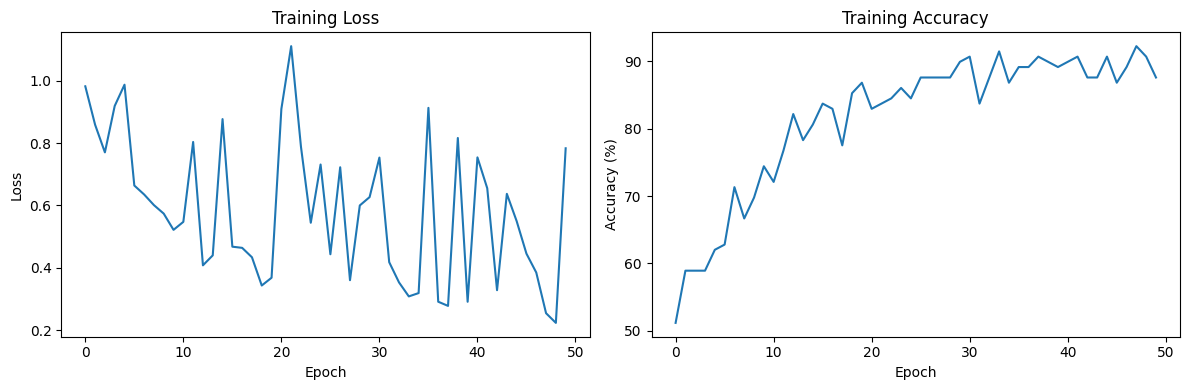

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()